In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix 
from sklearn.linear_model import LogisticRegression


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


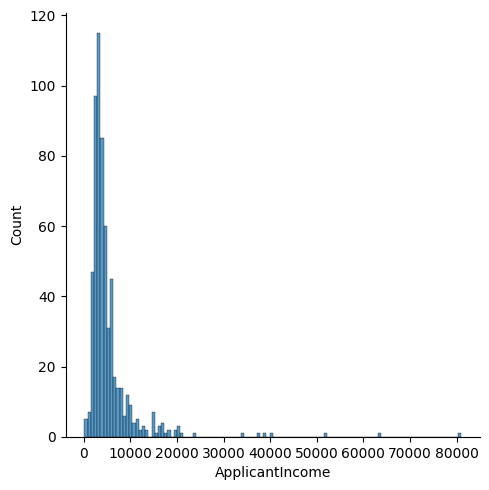

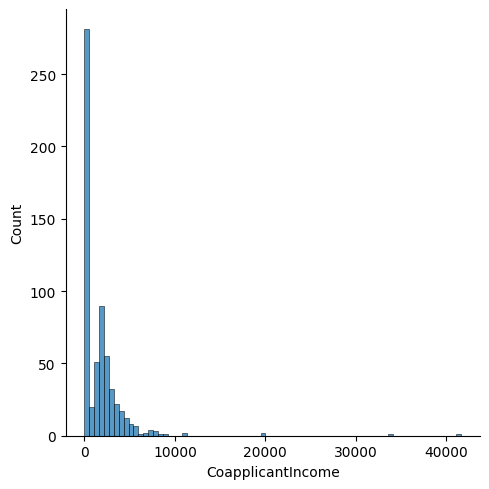

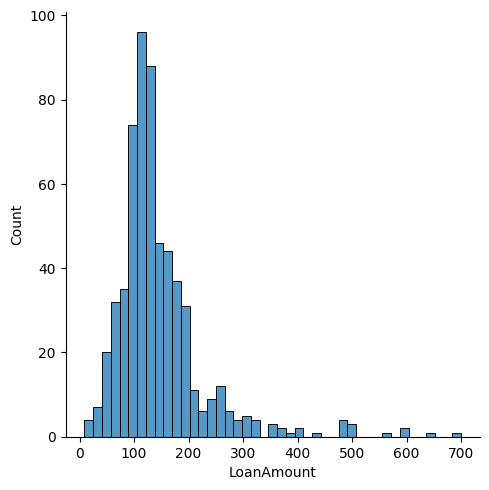

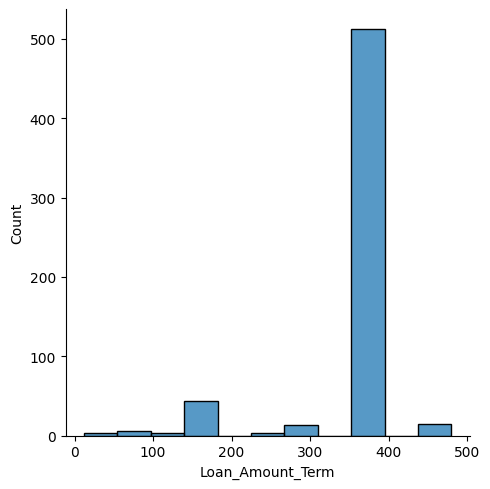

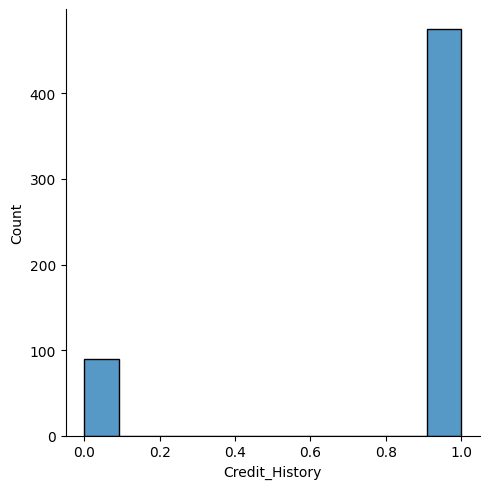

In [ ]:
#visualizing our numerical values to determine skewness
import seaborn as sb
import matplotlib.pyplot as plt
for i in df.columns[0:]:
  if(df[i].dtype == 'int64' or df[i].dtype == 'float64'):
    sb.displot(df[i])
    plt.show()

In [ ]:
#using median to full in null values because:
#it is a numerical value
#skewness representation above
df[['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']] = df[['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].fillna(df[['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [ ]:
#transform categorical variables to label encoder
#except loan ID because we wanted to leave it
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
for i in df.columns[1:]:
  if(df[i].dtype == 'object'):
    df[i]=le.fit_transform(df[i])


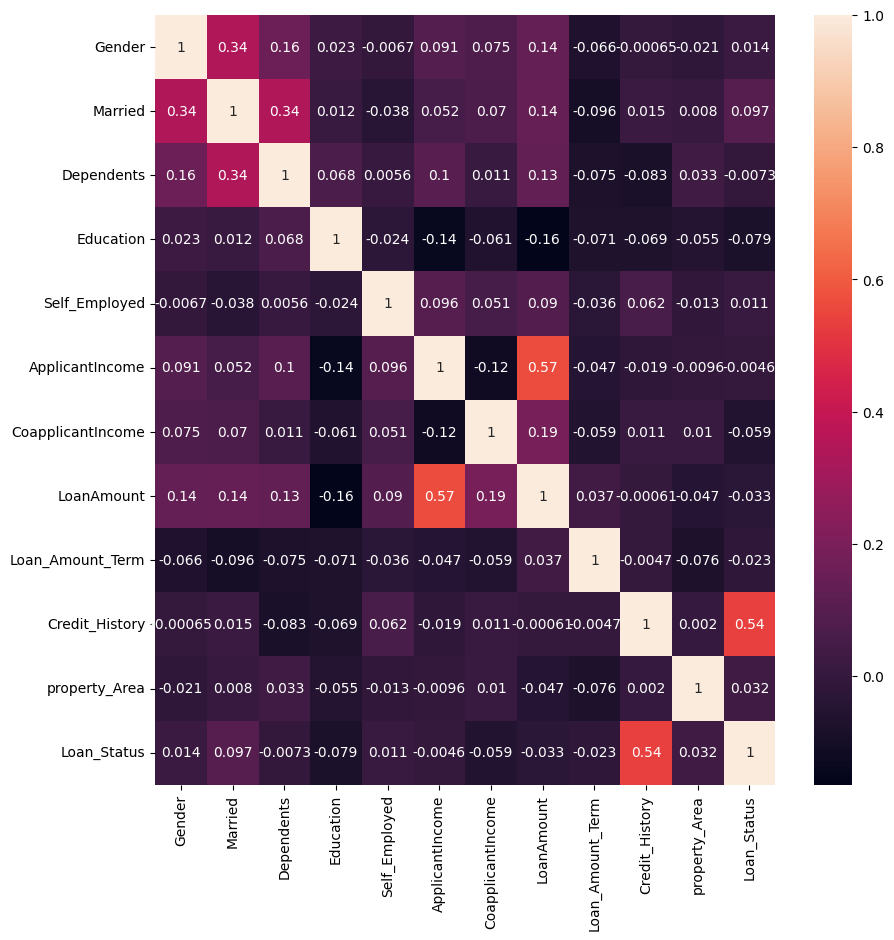

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(df.corr(),vmax=1,annot=True) 
heatmap.set_title=('correlation heatmap')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 62.5+ KB


In [ ]:
Xdata = df[['Dependents', 'ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Education', 'Self_Employed', 'property_Area']]
Ydata = df[['Loan_Status']]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
sel = RandomForestClassifier(n_estimators=100, random_state=0)
sel.fit(Xdata, Ydata)

<ipython-input-8-eb8d6ea9a440>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  sel.fit(Xdata, Ydata)


RandomForestClassifier(random_state=0)

In [ ]:
feature_scores = pd.Series(sel.feature_importances_, index=Xdata.columns).sort_values(ascending=False)

feature_scores

Credit_History       0.264569
ApplicantIncome      0.201591
LoanAmount           0.180269
CoapplicantIncome    0.113303
Dependents           0.051865
property_Area        0.045430
Loan_Amount_Term     0.043786
Self_Employed        0.027573
Gender               0.024399
Married              0.024289
Education            0.022926
dtype: float64

In [ ]:
df['Total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [ ]:
df = df.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','Married','property_Area','Gender','Self_Employed','Education'], axis=1)

In [ ]:
df.head()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_income
0,0,128.0,360.0,1.0,1,5849.0
1,1,128.0,360.0,1.0,0,5314.0
2,0,66.0,360.0,1.0,1,3000.0
3,0,120.0,360.0,1.0,1,4941.0
4,0,141.0,360.0,1.0,1,6000.0


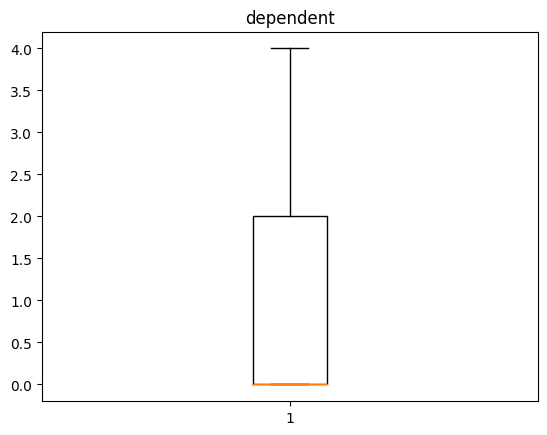

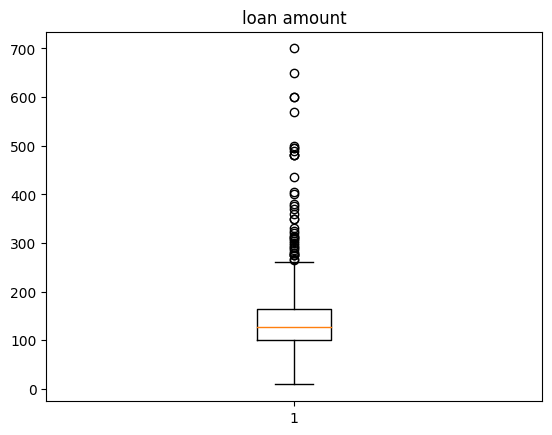

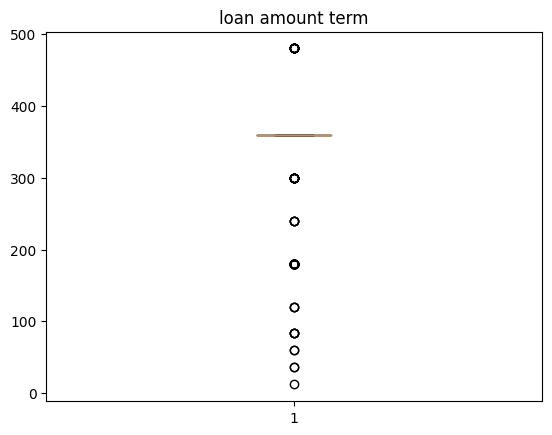

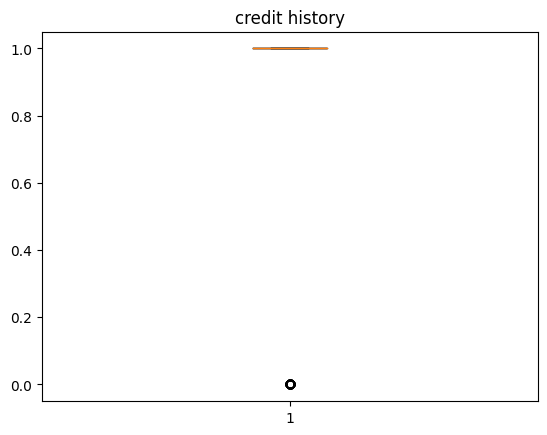

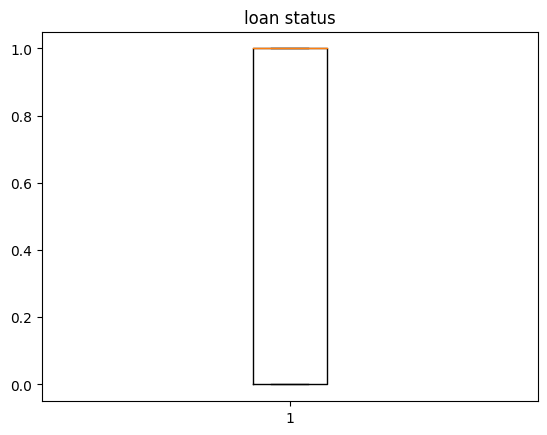

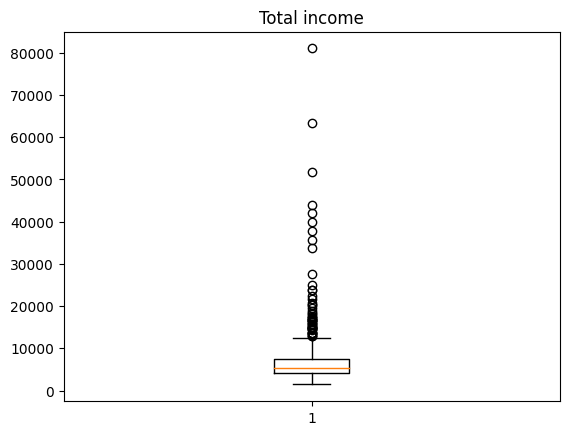

In [ ]:
plt.boxplot(df['Dependents'])
plt.title("dependent")

plt.show()
plt.boxplot(df['LoanAmount'])
plt.title("loan amount")

plt.show()
plt.boxplot(df['Loan_Amount_Term'])
plt.title("loan amount term")

plt.show()
plt.boxplot(df['Credit_History'])
plt.title("credit history")

plt.show()
plt.boxplot(df['Loan_Status'])
plt.title("loan status")
plt.show()
plt.boxplot(df['Total_income'])
plt.title("Total income")
plt.show()


In [ ]:
#removing outliers using quantile based method
print(df['LoanAmount'].quantile(0.10))
print(df['LoanAmount'].quantile(0.90))

print(df['Loan_Amount_Term'].quantile(0.10))
print(df['Loan_Amount_Term'].quantile(0.90))
print(df['Total_income'].quantile(0.10))
print(df['Total_income'].quantile(0.90))

72.30000000000001
229.4000000000001
300.0
360.0
3245.8
11462.800000000007


In [ ]:
df['LoanAmount'] = np.where(df['LoanAmount'] <72.3, 72.3,df['LoanAmount'])
df['LoanAmount'] = np.where(df['LoanAmount'] >229.4, 229.4,df['LoanAmount'])
df['Loan_Amount_Term'] = np.where(df['Loan_Amount_Term'] <300.0, 300.0,df['Loan_Amount_Term'])
df['Loan_Amount_Term'] = np.where(df['Loan_Amount_Term'] >360.0, 360.0,df['Loan_Amount_Term'])
df['Total_income'] = np.where(df['Total_income'] <3245.8, 3245.8,df['Total_income'])
df['Total_income'] = np.where(df['Total_income'] >11462.8, 11462.8,df['Total_income'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        614 non-null    int64  
 1   LoanAmount        614 non-null    float64
 2   Loan_Amount_Term  614 non-null    float64
 3   Credit_History    614 non-null    float64
 4   Loan_Status       614 non-null    int64  
 5   Total_income      614 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 28.9 KB


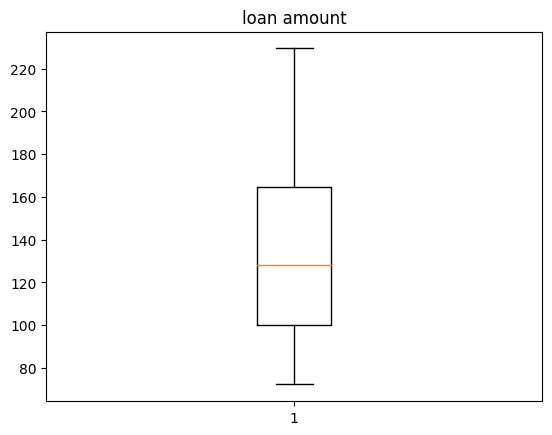

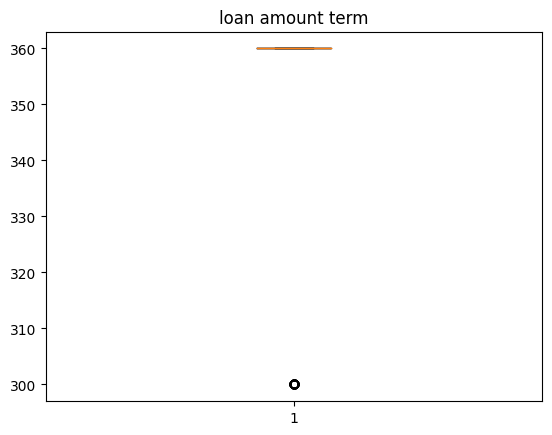

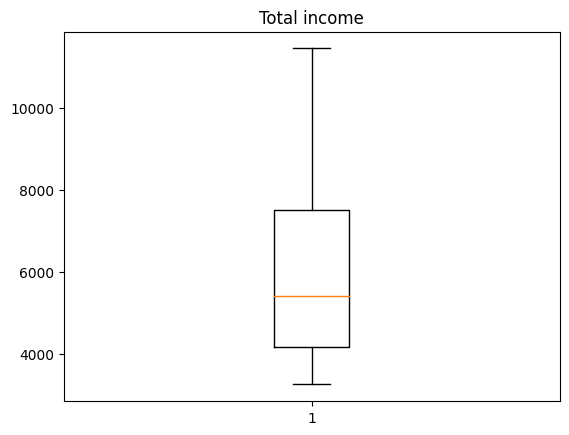

In [ ]:

plt.boxplot(df['LoanAmount'])
plt.title("loan amount")

plt.show()
plt.boxplot(df['Loan_Amount_Term'])
plt.title("loan amount term")

plt.show()


plt.boxplot(df['Total_income'])
plt.title("Total income")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        614 non-null    int64  
 1   LoanAmount        614 non-null    float64
 2   Loan_Amount_Term  614 non-null    float64
 3   Credit_History    614 non-null    float64
 4   Loan_Status       614 non-null    int64  
 5   Total_income      614 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 28.9 KB


In [ ]:
#over here we will be creating new dataframes to work with x and y, x being input and y being output
x = df[['Total_income','LoanAmount', 'Credit_History','Loan_Amount_Term','Dependents']]
#x = df[['Total_income','LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Married', 'Education', 'Rural','Semiurban', 'Urban'
y = df[['Loan_Status']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)


In [ ]:
model = LogisticRegression()


In [ ]:
model.fit(x_train, y_train.values.ravel())


LogisticRegression()

In [ ]:
ypredTest = model.predict(x_test)
ypredtrainData = model.predict(x_train)

In [ ]:
accuracyTrain = accuracy_score(y_train, ypredtrainData)
accuracyTest = accuracy_score(y_test ,ypredTest)

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve

f_score = f1_score(y_test, ypredTest)
print('F-score :', f_score)

F-score : 0.8934010152284264


In [ ]:
recall = recall_score(y_test, ypredTest)
print('recall score:', recall)


recall score: 0.9777777777777777


In [ ]:

precision = precision_score(y_test, ypredTest)
print('precision score:', precision)


precision score: 0.822429906542056


In [ ]:
test_accuracy = accuracyTest
print("accuracy for model on testing data:",test_accuracy)


accuracy for model on testing data: 0.8292682926829268


In [ ]:
train_accuracy = accuracyTrain
print("accuracy for model on training data",train_accuracy)

accuracy for model on training data 0.8044806517311609


In [ ]:
#Builing Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB();
nb.fit(x_train, y_train.values.ravel())
y_predNB = nb.predict(x_test)

In [ ]:
print(classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

